In [483]:
import pandas as pd # needed for most operation
import numpy as np # needed for some array operations
from sklearn.model_selection import train_test_split
import pickle
pd.__version__

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


In [587]:
data = pd.read_pickle("../data/IterImput")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

#2
data2 = pd.read_pickle("../data/IterImput_Test")



In [588]:
#pd.unique(data['Decreased_mobility'])
dec_mob = pd.cut(data['Decreased_mobility'],bins=[-0.1,10,20,30,40,50,60,70],labels=[1,2,3,4,5,6,7]) #numerical from 0 to 70
data['Decreased_mobility'] = dec_mob

#2
dec_mob = pd.cut(data2['Decreased_mobility'],bins=[-0.1,10,20,30,40,50,60,70],labels=[1,2,3,4,5,6,7]) #numerical from 0 to 70
data2['Decreased_mobility'] = dec_mob
data.head(50)

,Treatment,Fever,Duration_of_pain,Sick_leave,Earlier_hospitalization,Familiy_history,Depression,Extremely_nervous,Stress,Irrational_thoughts_risk_lasting,Irrational_thoughts_work,Coping_strategy,Kinesiophobia_physical_exercise,Kinesiophobia_pain_stop,Age,Uses_analgesics,Uses_corticosteroids,Serious_disease,Neurogenic_signals,Continuous_pain,Decreased_mobility,Nocturnal_pain,Weightloss_per_year,Loss_muscle_strength,Failure_symptoms,Incoordination,neck_pain_intensity,low_back_pain_intensity,arm_left_pain_intensity,arm_right_pain_intensity,leg_left_pain_intensity,leg_right_pain_intensity,Paidwork
0,1.0,1.0,10.000000,0.0,1.0,0.0,0.0,0.000000,0.0,9.000000,10.000000,0.000000,7.000000,7.000000,7.0,0.0,1.000000,1.0,1.0,1.0,5,1.0,3.0,1.000000,1.0,0.902839,0.0,8.0,8.0,7.0,6.0,6.0,0.0
1,3.0,1.0,10.000000,0.0,1.0,1.0,0.0,0.000000,1.0,5.000000,0.000000,7.000000,10.000000,10.000000,5.0,1.0,1.000000,1.0,1.0,1.0,4,1.0,2.0,1.000000,1.0,1.000000,7.0,8.0,7.0,4.0,0.0,0.0,1.0
2,1.0,1.0,10.000000,0.0,1.0,0.0,0.0,6.000000,1.0,8.000000,8.000000,2.000000,7.000000,7.000000,5.0,0.0,1.000000,1.0,1.0,1.0,3,0.0,4.0,0.000000,1.0,0.000000,3.0,5.0,0.0,2.0,0.0,3.0,0.0
3,5.0,1.0,10.000000,0.0,1.0,0.0,0.0,1.000000,1.0,10.000000,3.000000,1.000000,10.000000,10.000000,5.0,0.0,1.000000,1.0,1.0,1.0,6,1.0,4.0,1.000000,0.0,0.969348,2.0,9.0,0.0,0.0,9.0,5.0,0.0
4,1.0,1.0,10.000000,0.0,1.0,0.0,0.0,0.000000,1.0,7.000000,10.000000,7.000000,7.000000,9.000000,5.0,0.0,1.000000,1.0,1.0,1.0,3,1.0,2.0,0.000000,1.0,0.435946,0.0,7.0,5.0,0.0,0.0,0.0,0.0
5,5.0,1.0,10.000000,0.0,1.0,0.0,0.0,2.000000,1.0,6.000000,7.000000,8.000000,8.000000,9.000000,7.0,0.0,1.000000,1.0,1.0,1.0,3,1.0,4.0,1.000000,1.0,0.000000,0.0,8.0,0.0,0.0,0.0,0.0,0.0
6,5.0,1.0,10.000000,0.0,1.0,0.0,1.0,10.000000,1.0,9.000000,9.000000,2.000000,9.000000,9.000000,3.0,0.0,1.000000,1.0,1.0,1.0,4,1.0,1.0,0.000000,1.0,1.000000,2.0,8.0,0.0,0.0,9.0,0.0,0.0
7,5.0,1.0,10.000000,0.0,1.0,0.0,0.0,3.000000,0.0,10.000000,7.000000,2.000000,6.000000,5.000000,3.0,0.0,1.000000,1.0,1.0,1.0,4,1.0,3.0,1.000000,1.0,0.911908,0.0,8.0,0.0,0.0,3.0,3.0,0.0
8,5.0,1.0,10.000000,0.0,1.0,0.0,0.0,3.000000,1.0,5.000000,0.000000,4.000000,4.000000,10.000000,3.0,0.0,1.000000,1.0,1.0,1.0,4,1.0,1.0,1.000000,1.0,1.000000,0.0,4.0,0.0,0.0,0.0,0.0,0.0
9,5.0,1.0,10.000000,0.0,1.0,0.0,0.0,0.000000,0.0,5.000000,10.000000,5.000000,10.000000,10.000000,8.0,0.0,1.000000,1.0,1.0,1.0,4,1.0,1.0,1.000000,1.0,0.779063,8.0,8.0,0.0,0.0,3.0,0.0,0.0


In [593]:
#X and y extractions, lines depend if balanced dataset (we extract training and test set by separate) or not
data.columns
#X_train = data.loc[:, data.columns != 'Treatment']
#y_train = data['Treatment'].astype(int)

#2
#X_test = data2.loc[:, data2.columns != 'Treatment']
#y_test = data2['Treatment'].astype(int)


#print(y_train.value_counts())
#print(X_train.columns)

#X = data.loc[:, data.columns != 0]
#y = data[0]2

X = data.loc[:, data.columns != 'Treatment']
y = data['Treatment'].astype(int)
print(y.value_counts())
print(X.columns)


1    659
5    649
2    160
3     65
Name: Treatment, dtype: int64
Index(['Fever', 'Duration_of_pain', 'Sick_leave', 'Earlier_hospitalization',
       'Familiy_history', 'Depression', 'Extremely_nervous', 'Stress',
       'Irrational_thoughts_risk_lasting', 'Irrational_thoughts_work',
       'Coping_strategy', 'Kinesiophobia_physical_exercise',
       'Kinesiophobia_pain_stop', 'Age', 'Uses_analgesics',
       'Uses_corticosteroids', 'Serious_disease', 'Neurogenic_signals',
       'Continuous_pain', 'Decreased_mobility', 'Nocturnal_pain',
       'Weightloss_per_year', 'Loss_muscle_strength', 'Failure_symptoms',
       'Incoordination', 'neck_pain_intensity', 'low_back_pain_intensity',
       'arm_left_pain_intensity', 'arm_right_pain_intensity',
       'leg_left_pain_intensity', 'leg_right_pain_intensity', 'Paidwork'],
      dtype='object')


1
              precision    recall  f1-score   support

           1       0.52      0.47      0.49       148
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        14
           5       0.42      0.63      0.50       114

    accuracy                           0.46       307
   macro avg       0.23      0.28      0.25       307
weighted avg       0.41      0.46      0.43       307

[[70  0  0 78]
 [15  0  0 16]
 [ 8  0  0  6]
 [42  0  0 72]]


C:\Users\pauco\Documents\ANACONDA\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pauco\Documents\ANACONDA\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pauco\Documents\ANACONDA\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

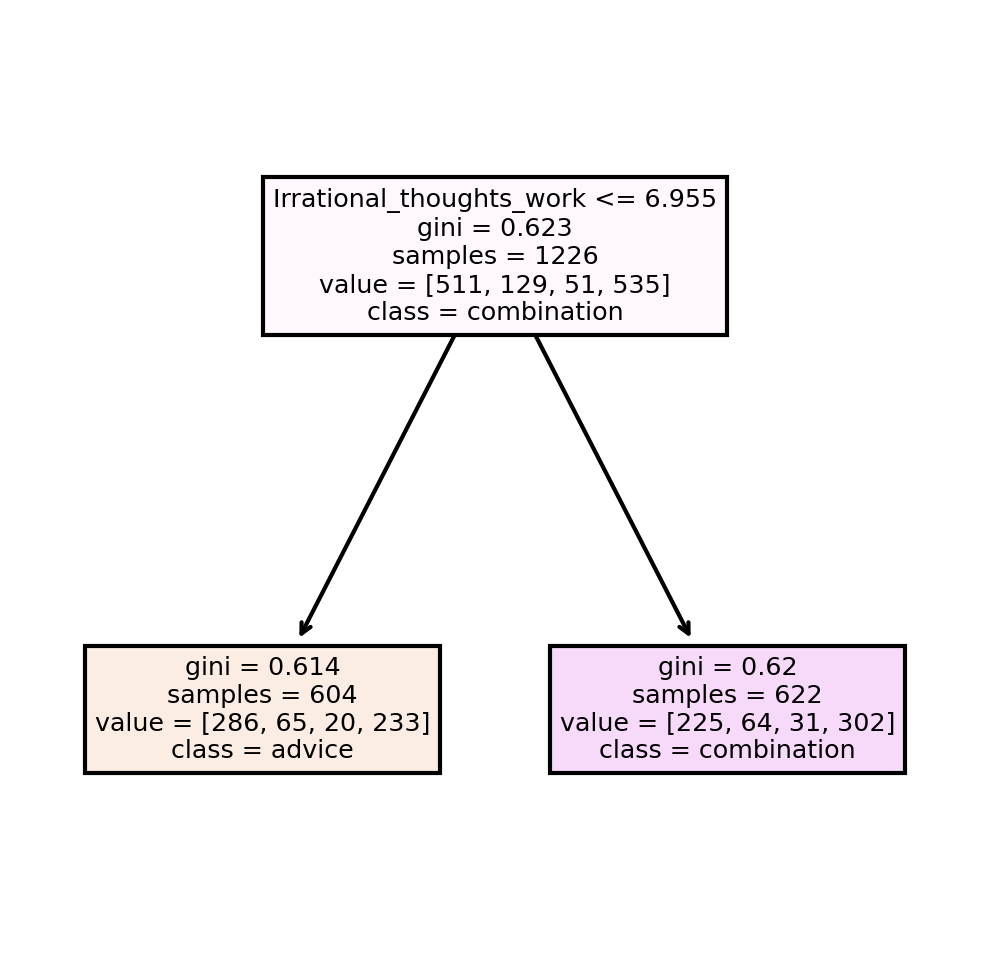

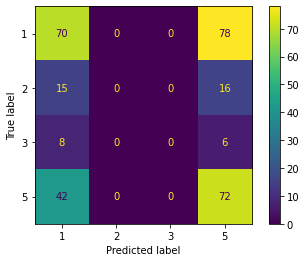

0.46254071661237783


In [595]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_tree = DecisionTreeClassifier(ccp_alpha=0.005) #max_depth=100 #ccp_alpha = 


#in case balanced dataset, test set different file
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
#X_train=X_train2
#y_train=y_train2

model_tree = model_tree.fit(X_train, y_train)

#plotting tree
fn=X_test.columns
cn=['advice', 'rehab', 'surgery','combination']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);


#plt.figure(figsize=(30,30)) # set plot size (denoted in inches)
#tree.plot_tree(model_tree, fontsize=30)
#plt.show()
print(model_tree.get_depth())

#AIXO FERHO AMB TRAINING O TEST SET? DESPRES PODEM CROSS VALIDAR
y_predict = model_tree.predict(X_test)
print(classification_report(y_test,y_predict))

#tree_cv = cross_val_score(model_tree,X_train,y=Y_train, cv=10)
#np.mean(tree_cv)

print(confusion_matrix(y_test, y_predict))

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
#print(classification_report(y_test, y_predict))
#accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

#importances = model_tree.feature_importances_

print(model_tree.score(X_test,y_test))


In [596]:
#AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=2)
metrics.auc(fpr, tpr)

metrics.roc_auc_score(y_test, model_tree.predict_proba(X_test), multi_class='ovr')


0.5110898825578459

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03439748462763459


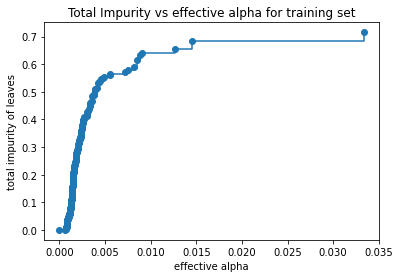

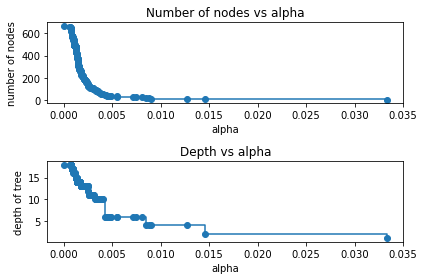

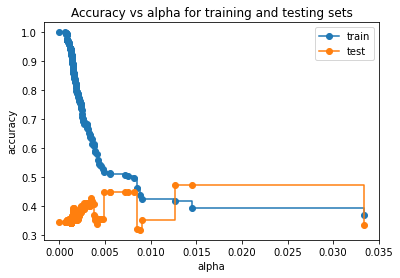

In [490]:
#Cost complexity pruning
path = model_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

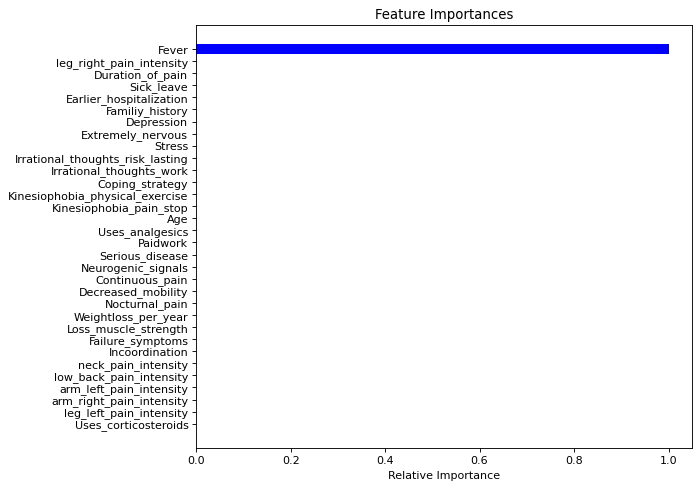

In [501]:
features = X_train.columns
importances = model_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8, 7), dpi=80)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.figure
plt.show()


              precision    recall  f1-score   support

           1       0.60      0.44      0.51       148
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        14
           5       0.43      0.75      0.55       114

    accuracy                           0.49       307
   macro avg       0.26      0.30      0.26       307
weighted avg       0.45      0.49      0.45       307

[[65  0  0 83]
 [12  0  0 19]
 [ 3  0  0 11]
 [28  0  0 86]]


C:\Users\pauco\Documents\ANACONDA\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pauco\Documents\ANACONDA\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pauco\Documents\ANACONDA\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

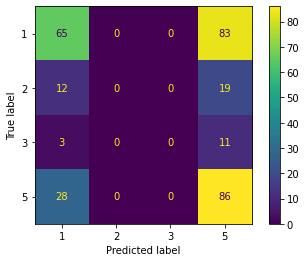

0.49185667752442996


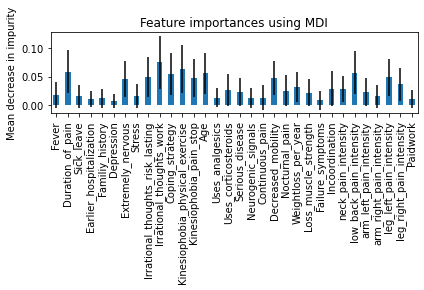

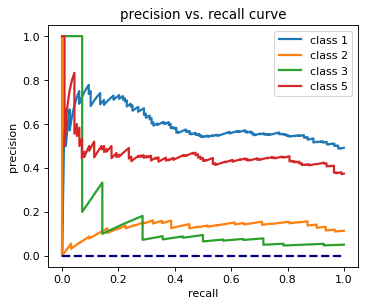

AUC for Class 1: 0.6284208737038925
AUC for Class 2: 0.6423562412342216
AUC for Class 3: 0.6479765967820575
AUC for Class 4: 0.6115353149713663


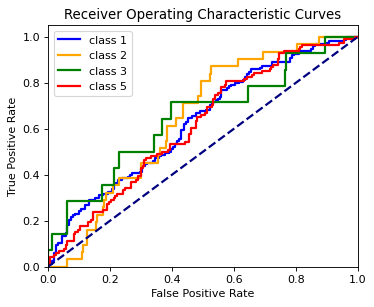

0.6325722566728845

In [629]:
# RANDOM FORESTS + MEAN DECREASE IN IMPURITY FEAT IMPORTANCES

feature_names = [X_train.columns[i] for i in range(X_train.shape[1])]

forest = RandomForestClassifier(random_state=0, max_depth=6) #DEFAULT 100 TREES
forest.fit(X_train, y_train)
for_importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(for_importances, index=feature_names)

y_predict = forest.predict(X_test)
print(classification_report(y_test,y_predict))

print(confusion_matrix(y_test, y_predict))

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

print(forest.score(X_test,y_test))


#Calculate the y_score
y_score = forest.predict_proba(X_test)
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 5])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

#PRECISION RECALL CURVE
plt.figure(figsize=(5, 4), dpi=80)

colors=['blue','orange','green','red']
a= [1,2,3,5]

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(a[i]))
 

plt.plot([0, 1], [0, 0], color='navy', lw=2, linestyle='--')

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()



#ROC AUC CURVE
plt.figure(figsize=(5, 4), dpi=80)

colors=['blue','orange','green','red']
a= [1,2,3,5]

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='class {}'.format(a[i]))
  print('AUC for Class {}: {}'.format(i+1, metrics.auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.title('Receiver Operating Characteristic Curves')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=2)
metrics.auc(fpr, tpr)

metrics.roc_auc_score(y_test, forest.predict_proba(X_test), multi_class='ovr')

0.6329657397426046

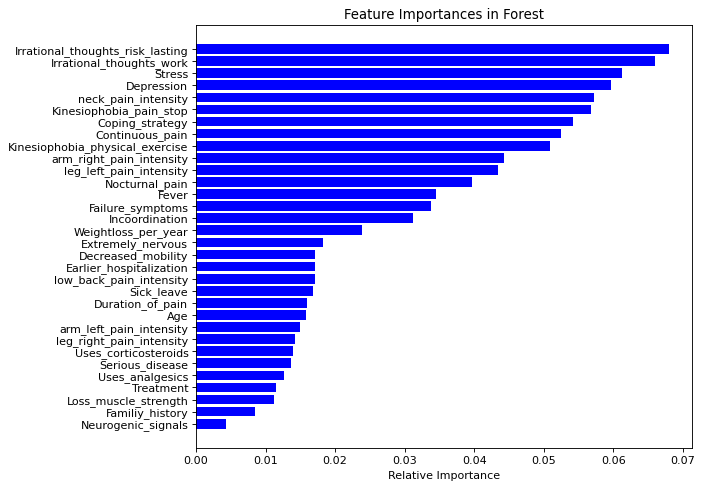

In [626]:
#FEATURE IMPORTANCE MDI FORESTS

features = data.columns
importances = forest.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8, 7), dpi=80)
plt.title('Feature Importances in Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.figure
plt.show()

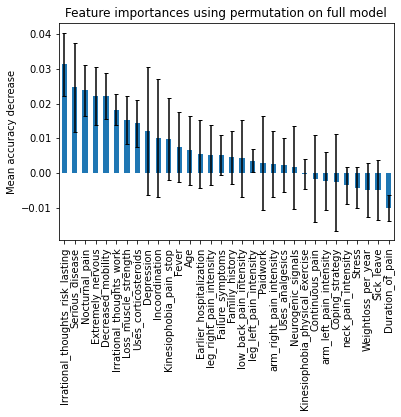

In [627]:
#PERMUTATION IMPORTANCE

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

forest_importances = forest_importances.sort_values(ascending=False)

ig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax, align='center', alpha=1, ecolor='black', capsize=2)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

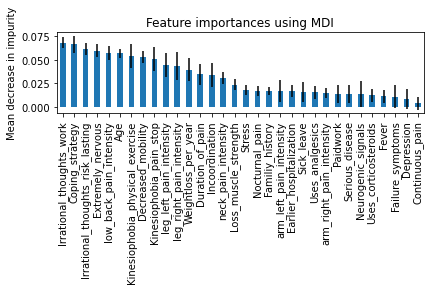

In [628]:
#result = permutation_importance(
#    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
#)

#sorted_idx = result.importances_mean.argsort()
#fig, ax = plt.subplots()
#ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
#ax.set_title("Permutation Importances (test set)")
#fig.tight_layout()
#plt.show()

#MDI FEATURE IMPORTANCES RANDOM FOREST V2 -- EXECUTE RIGHT AFTER FOREST
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [ ]:
#AUC
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=2)
#metrics.auc(fpr, tpr)

#metrics.roc_auc_score(y_test, forest.predict_proba(X_test), multi_class='ovr')

#PRECISION RECALL
#metrics.average_precision_score(y_test, forest.predict_proba(X_test), multi_class='ovr')
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
#%matplotlib inline

n_classes = len(set(y))

print(y_test)

y_test = label_binarize(y_test, classes=[1,2,3,5])
y_train = label_binarize(y_train, classes=[1,2,3,5])

print("a")
print(y_test)

#X_train, X_test, y_train, y_test = train_test_split(X,
                                                    #Y,test_size=0.2, random_state=42)

#2
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)
#Y2 = label_binarize(y2, classes=[1,2,3,5])
#X_train=X_train2
#y_train=y_train2
                            

clf = OneVsRestClassifier(RandomForestClassifier(random_state=0, max_depth=8))
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)

y_predict = clf.predict(X_test)
print(classification_report(y_test,y_predict))


# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    a = [1,2,3,5]
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(a[i]))

plt.plot([0, 1], [0, 0], color='navy', lw=2, linestyle='--')
#no_skill = len(y_test[y_test==1]) / len(y_test)
#plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    a = [1,2,3,5]
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(a[i]))
    print('AUC for Class {}: {}'.format(i+1, metrics.auc(fpr[i], tpr[i])))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

Y.sum(axis=0).all()

#print(y)